In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import six
import sys
sys.modules['sklearn.externals.six'] = six
from helper import set_seeds, create_folder_if_it_doesnt_exist, get_x_test,  calculate_test_results, REAL_DATA, SYN_DATA
from plot_helper import get_folder_name_from_args, plot_results_during_training,\
        display_final_results, display_results, VANILLA_QR, OQR_CORR, OQR_HSIC

%load_ext autoreload
%autoreload 2

seeds = range(30)

C:\Users\Shai\anaconda3\envs\oqr\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Shai\anaconda3\envs\oqr\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


# Orthogonal QR: Display results

## Display During Training Results 

### Run `python run_all_synthetic_data_experiments.py` in the folder `reproducible_experiments` to receive all during traning results of the synthetic data
### Alternatively, run main.py with the flag: `--save_training_results 1` to save the results of the training process


In [ ]:
data_type = SYN_DATA
data_name = '3'

results_dir = f'results/during_training/{data_type.replace(" ", "_")}/{data_name}/'

result_during_training_name = (results_dir + "results_during_training").replace(" ", "_")
results_during_training = pickle.load(open(result_during_training_name, "rb"))

print(f"Possible args to choose from: {list(results_during_training.keys())}")

In [ ]:
args_name = 'loss=batch_qr_bs=1024_corr_mult=0.0_hsic_mult=0.0'
print(f"Possible seed values to choose from: {list(results_during_training[args_name].keys())}")

In [ ]:
seed_value = 42
curr_results_during_training = results_during_training[args_name][seed_value]

alpha = 0.1
mpl.rc('font', **{'size'   : 13})

line_width = 2
save_dir = f'./results/figures/syn/during_training/seed={seed_value}'
create_folder_if_it_doesnt_exist(save_dir)

if 'corr_mult=0.0' in args_name:
    majority_title = "Majority Group (vanilla QR)"
    minority_title = "Minority Group (vanilla QR)"
    last_epoch_to_present = len(curr_results_during_training['coverage_over_train_group_0']) - 1
else:
    majority_title = "Majority Group (orthogonal QR)"
    minority_title = "Minority Group (orthogonal QR)"
    last_epoch_to_present = len(curr_results_during_training['coverage_over_train_group_0']) -1 # - 200 + 10


desired_accuracy = 1-alpha

plt.plot(curr_results_during_training['coverage_over_train_group_0'][:last_epoch_to_present], label="Train", linewidth=line_width)
plt.plot(curr_results_during_training['coverage_over_test_group_0'][:last_epoch_to_present], label="Test", linewidth=line_width)
plt.axhline(y=desired_accuracy, color='r', linestyle='--',  label="Nominal Coverage Level")
plt.axvline(len(curr_results_during_training['coverage_over_train_group_0']) - 200, color='purple',  linestyle='-', label="Best Epoch")

plt.legend(loc="lower right")


plt.title(majority_title)
plt.xlabel("Epoch")
plt.ylabel("Coverage")
plt.savefig(f'{save_dir}/{majority_title}.png', dpi=300)
plt.show()

plt.plot(curr_results_during_training['coverage_over_train_group_1'][:last_epoch_to_present], label="Train", linewidth=line_width)
plt.plot(curr_results_during_training['coverage_over_test_group_1'][:last_epoch_to_present], label="Test", linewidth=line_width)
plt.axhline(y=desired_accuracy, color='r', linestyle='--', label="Nominal Coverage Level")
plt.axvline(len(curr_results_during_training['coverage_over_train_group_1']) - 200, color='purple',  linestyle='-', label="Best Epoch")


plt.title(minority_title)
plt.xlabel("Epoch")
plt.ylabel("Coverage")
plt.savefig(f'{save_dir}/{minority_title}.png', dpi=300)
plt.show()



In [ ]:
print('majority train coverage: {:.2f}, majority test coverage: {:.2f}'.
      format(curr_results_during_training['coverage_over_train_group_0'][-201]*100,
      curr_results_during_training['coverage_over_test_group_0'][-201]*100))

print('majority train avg length: {:.2f}, majority test avg length: {:.2f}'.
      format(curr_results_during_training['interval_lengths_over_train_group_0'][-201],
      curr_results_during_training['interval_lengths_over_test_group_0'][-201]))
print()

print('minority train: {:.2f}, minority test: {:.2f}'.
      format(curr_results_during_training['coverage_over_train_group_1'][-201]*100,
      curr_results_during_training['coverage_over_test_group_1'][-201]*100))


print('minority train avg length: {:.2f}, minority test avg length: {:.2f}'.
      format(curr_results_during_training['interval_lengths_over_train_group_1'][-201],
      curr_results_during_training['interval_lengths_over_test_group_1'][-201]))

# Synthetic Data Results - averaged over 30 seeds

### Run `python run_all_synthetic_data_experiments.py` in the folder `reproducible_experiments` to receive all results of the synthetic data

## Pinball loss

In [ ]:
"""
possible loss_method = ['qr,' 'int']

"""

display_results(['3', '10'], loss_method='qr',
                              corr_multipliers=[0.,0.5], hsic_multipliers=[0.], 
                              seeds=seeds,desired_coverage=0.9, is_real=False, print_latex=False)

styled_final_df = display_final_results('qr', 'Vanilla QR', 'OQR (corr)', is_real=False) 

## Interval score loss

In [ ]:
display_results(['3', '10'], loss_method='int', corr_multipliers=[0., 3.], hsic_multipliers=[0.],
                is_real=False, print_latex=False)

styled_final_df = display_final_results('int', 'Vanilla QR', 'OQR (corr)', is_real=False)

# Weighted QR (pinball loss)

In [7]:
display_results(['3', '10'], loss_method='wqr',
                              corr_multipliers=[0.,3.], hsic_multipliers=[0.], 
                              seeds=range(60),desired_coverage=0.9, is_real=False, print_latex=False, keep_cov_and_len=False)

styled_final_df = display_final_results('wqr', baseline_method='Vanilla WQR', improved_method='OWQR (corr)',
                                        is_real=False, to_latex=False)



Mean values and standard errors:


Pearson's corr                         HSIC                        ΔWSC  \
      Vanilla WQR    OWQR (corr)   Vanilla WQR  OWQR (corr)    Vanilla WQR   
3   0.049 (0.004)  0.054 (0.005)   7e-4 (4e-5)  4e-4 (4e-5)  1.744 (0.202)   
10  0.066 (0.007)  0.073 (0.006)  0.001 (6e-5)  2e-4 (1e-5)  2.725 (0.215)   

                   
      OWQR (corr)  
3   1.839 (0.198)  
10  1.885 (0.163)

# Real Dataset Results - averaged over 30 seeds
### Run `python run_all_real_data_experiments.py` in the folder `reproducible_experiments` to receive all results of the real data

In [ ]:
possible_dataset_names = ['facebook_1', 'facebook_2','blog_data', 'bio',\
                 'kin8nm', 'naval','meps_19', 'meps_20', 'meps_21']


## Pinball loss

In [ ]:
"""
possible dataset_names = ['facebook_1', 'facebook_2','blog_data', 'bio',\
                 'kin8nm', 'naval','meps_19', 'meps_20', 'meps_21']
   
possible loss_method = ['qr,' 'int']

"""

dataset_names = ['facebook_1', 'facebook_2','blog_data', 'bio',\
                 'kin8nm', 'naval','meps_19', 'meps_20', 'meps_21']

display_results(dataset_names, loss_method='qr',
                              corr_multipliers=[0., 0.1, 0.5], hsic_multipliers=[0.], 
                              seeds=seeds,desired_coverage=0.9, is_real=True, print_latex=False)

styled_final_df = display_final_results('qr', baseline_method='Vanilla QR', improved_method='OQR (corr)', is_real=True)

## Interval score loss

In [ ]:
dataset_names = possible_dataset_names

display_results(dataset_names, loss_method='int',
                              corr_multipliers=[0., 0.1, 0.5, 1., 3.], hsic_multipliers=[0.], 
                              seeds=seeds,desired_coverage=0.9, is_real=True, print_latex=False)

styled_final_df = display_final_results('int', baseline_method='Vanilla QR', improved_method='OQR (corr)', is_real=True)

# Weighted QR (pinball loss)

In [ ]:
dataset_names = ['facebook_1', 'facebook_2','blog_data', 'bio',\
                 'kin8nm', 'naval','meps_19', 'meps_20', 'meps_21']


display_results(dataset_names, loss_method='wqr',
                              corr_multipliers=[0., 0.1, 0.5], hsic_multipliers=[0.], 
                              seeds=seeds,desired_coverage=0.9, is_real=True, print_latex=False)

styled_final_df = display_final_results('wqr', baseline_method='Vanilla WQR', improved_method='OWQR (corr)', is_real=True)

## Pinball loss and HSIC
### Vanilla QR vs Orthogonal QR (with pinball loss and HSIC)

In [ ]:
dataset_names =possible_dataset_names

display_results(dataset_names, loss_method='qr',
                              corr_multipliers=[0.], hsic_multipliers=[0., 0.1, 0.5], 
                              base_method=VANILLA_QR, improved_method=OQR_HSIC,
                              seeds=seeds,desired_coverage=0.9, is_real=True, print_latex=False)

styled_final_df = display_final_results('qr', baseline_method='Vanilla QR', improved_method='OQR (HSIC)', is_real=True)

###  Orthogonal QR (with pinball loss and HSIC) vs  Orthogonal QR (with pinball loss and decorrelation)

In [ ]:
dataset_names = possible_dataset_names


display_results(dataset_names, loss_method='qr',
                              corr_multipliers=[0., 0.1, 0.5], hsic_multipliers=[0., 0.1, 0.5], 
                              base_method=OQR_HSIC, improved_method=OQR_CORR,
                              seeds=seeds,desired_coverage=0.9, is_real=True, print_latex=False)

styled_final_df = display_final_results('qr', baseline_method='OQR (HSIC)',
                                        improved_method='OQR (corr)', is_real=True)

# Conformalized Quantile Regression (pinball loss)
## Vanilla CQR vs Orthogonal CQR (decorrelation penalty)

In [ ]:
dataset_names = possible_dataset_names


display_results(dataset_names, loss_method='qr',
                              corr_multipliers=[0., 0.1, 0.5], hsic_multipliers=[0.], 
                              seeds=seeds, desired_coverage=0.9, is_calibrated=True, is_real=True)

styled_final_df = display_final_results('cal_qr', baseline_method='Vanilla CQR',
                                        improved_method='OCQR (corr)', is_real=True)

# Quantile regression forest

In [ ]:
"""
possible dataset_names = ['facebook_1', 'facebook_2','blog_data', 'bio',\
                 'kin8nm', 'naval','meps_19', 'meps_20', 'meps_21']
   
possible loss_method = ['qr,' 'int']

"""

dataset_names = ['facebook_1', 'blog_data', 'bio',\
                 'kin8nm', 'naval','meps_19', 'meps_20', 'meps_21']

display_results(dataset_names, method='qr_forest', 
                              seeds=seeds,desired_coverage=0.9, is_real=True, print_latex=False, keep_cov_and_len=True)

# Parameters as a function of regularization multiplier

In [37]:
from argparse import Namespace
import pandas as pd
from helper import get_method_results_dir
import numpy as np

method_args = Namespace(
    loss='batch_qr',
    bs=1024,
    hsic_mult=0.0,
    method='QR'
    )
data_name =  "minority_group_uncertainty=3"
seeds = range(20)
corr_mults = [0., 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # = gamma

total_df = pd.DataFrame()
features = ['coverage', 'interval_len', 'interval_len_var', 'test_pearson_corr',  'test_hsic', 'test_wsc_diff']
reduction_method = np.mean

for corr_mult in corr_mults:
    corr_mult = float(corr_mult)
    method_args.corr_mult = corr_mult
    seeds_df = pd.DataFrame()
    for seed in seeds:
        results_dir = get_method_results_dir(SYN_DATA, data_name, method_args)
        results_path = f"{results_dir}/seed={seed}.csv"
        df = pd.read_csv(results_path)
        df = df.drop(['Unnamed: 0'], axis=1)
        df = df[features]
        seeds_df = seeds_df.append(df)
    seeds_df = seeds_df.apply(reduction_method, axis=0).to_frame(corr_mult)
    total_df = total_df.append(seeds_df.T)

feature_name_map = {
    'coverage': 'Coverage', 
    'interval_len': 'Avg. length',
    'interval_len_var': "Length's variance", 
    'test_pearson_corr': "Pearson's correlation",  
    'test_hsic': "HSIC",
    'test_wsc_diff': "ΔWSC"
}

feature_save_name_map = {
    'coverage': 'Coverage', 
    'interval_len': 'Avg_length',
    'interval_len_var': "Interval's_length_variance", 
    'test_pearson_corr': "Pearson's_correlation",  
    'test_hsic': "HSIC",
    'test_wsc_diff': "ΔWSC"
}

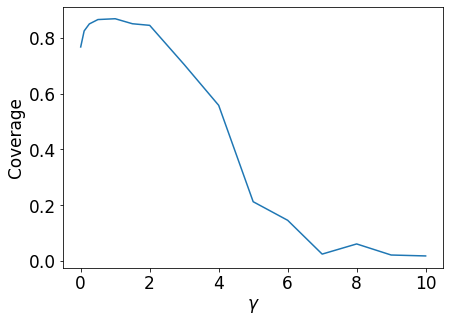

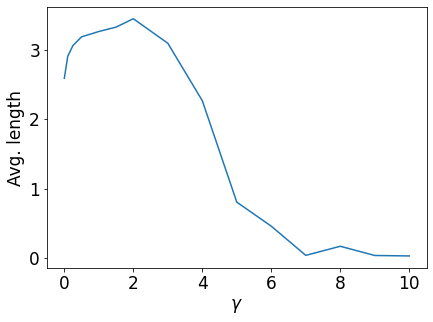

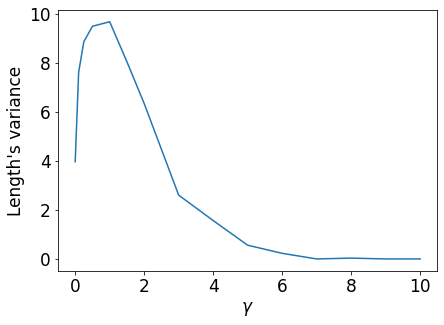

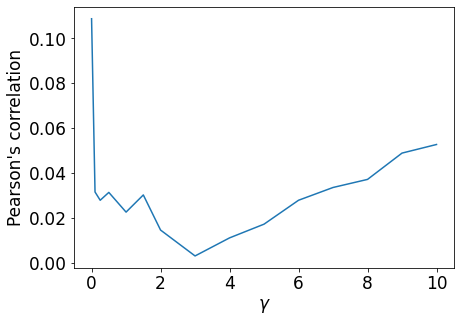

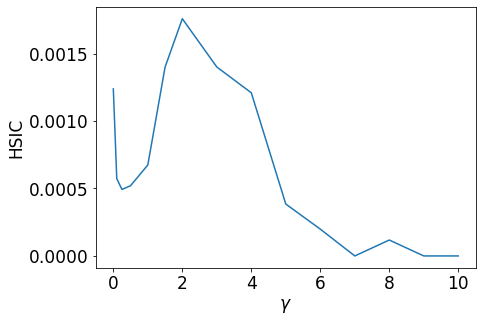

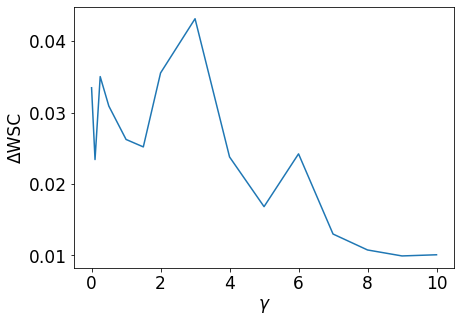

In [45]:
from helper import get_feature_as_function_of_mult_figure_dir
import matplotlib 
from matplotlib.pyplot import figure


for feature in features:
    figure(figsize=(6.8, 4.8))
    original_feature_name = feature
    plt.plot(abs(total_df[feature]))
    feature = feature_name_map[feature]
    plt.xlabel("$\gamma$")
    plt.ylabel(feature)
#     plt.title(f"{feature} vs $\gamma$")
    save_dir = get_feature_as_function_of_mult_figure_dir(SYN_DATA, data_name, mult="corr", args=method_args)
    create_folder_if_it_doesnt_exist(save_dir)
    matplotlib.rc('font', **{'size': 17})
    plt.savefig(f"{save_dir}/{feature_save_name_map[original_feature_name]}.png", dpi=300)
    plt.show()